In [1]:
# Run only once:
# import Pkg; Pkg.add("IterTools"); Pkg.update()

In [2]:
include("ch3.jl")

infer (generic function with 6 methods)

#### Example 3.1: Product of two factors
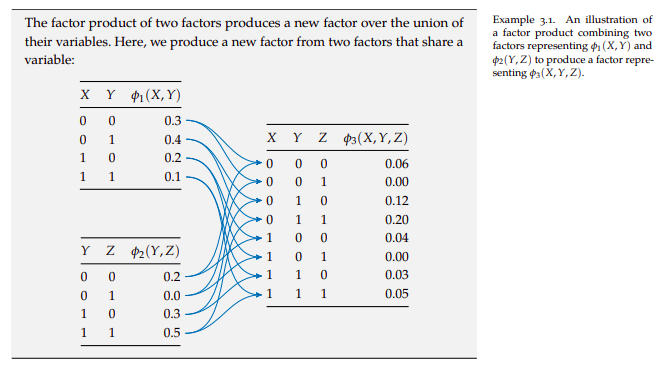

In [ ]:
X = Variable(:x, 2); Y = Variable(:y, 2); Z = Variable(:z, 2)

ϕ1 = Factor([X, Y], FactorTable(
            (x=1,y=1) => 0.3, (x=1,y=2) => 0.4,
            (x=2,y=1) => 0.2, (x=2,y=2) => 0.1))

ϕ2 = Factor([Y, Z], FactorTable(
            (y=1,z=1) => 0.2, (y=1,z=2) => 0.0,
            (y=2,z=1) => 0.3, (y=2,z=2) => 0.5))

ϕ1*ϕ2

#### Example 3.2: Factor Marginalization
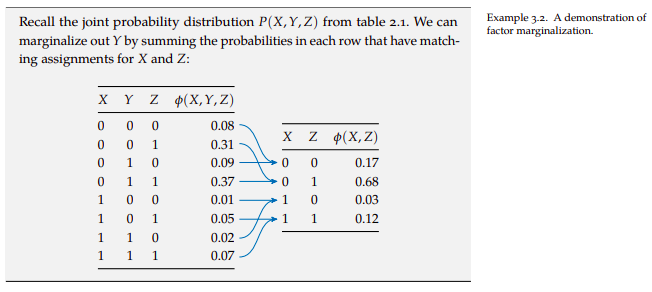

In [ ]:
X = Variable(:x, 2); Y = Variable(:y, 2); Z = Variable(:z, 2)

ϕ = Factor([X, Y, Z], FactorTable(
        (x=1,y=1,z=1) => 0.08,
        (x=1,y=1,z=2) => 0.31,
        (x=1,y=2,z=1) => 0.09,
        (x=1,y=2,z=2) => 0.37,
        (x=2,y=1,z=1) => 0.01,
        (x=2,y=1,z=2) => 0.05,
        (x=2,y=2,z=1) => 0.02,
        (x=2,y=2,z=2) => 0.07,
        ))

In [ ]:
marginalize(ϕ, :y)

#### Example 3.3: Setting Evidence
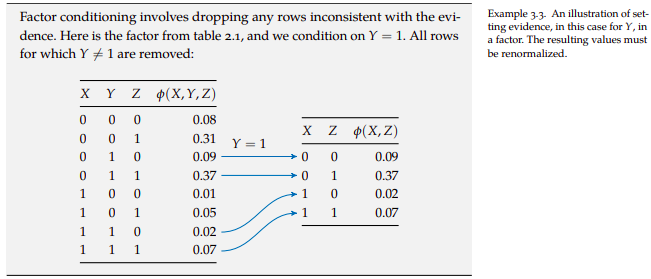

In [ ]:
ϕ

In [ ]:
in_scope(:y, ϕ)

In [ ]:
# Calling the first version of condition that takes a 3 args
condition(ϕ,:y, 2)

In [ ]:
# Calling the second version of condition that takes 2 args
# e = (; :y=>2, :z=>2)
e = (; :y=>2)
typeof(e)

In [ ]:
condition(ϕ,e)

#### Example 3.4: Sum-Product Variable Elimination

In [ ]:
B = Variable(:b, 2); S = Variable(:s, 2)
E = Variable(:e, 2)
D = Variable(:d, 2); C = Variable(:c, 2)
vars = [B, S, E, D, C]
factors = [
    Factor([B], FactorTable((b=1,) => 0.99, (b=2,) => 0.01)),
    Factor([S], FactorTable((s=1,) => 0.98, (s=2,) => 0.02)),
    Factor([E, B, S], FactorTable(
            (e=1,b=1,s=1) => 0.90, (e=1,b=1,s=2) => 0.04,
            (e=1,b=2,s=1) => 0.05, (e=1,b=2,s=2) => 0.01,
            (e=2,b=1,s=1) => 0.10, (e=2,b=1,s=2) => 0.96,
            (e=2,b=2,s=1) => 0.95, (e=2,b=2,s=2) => 0.99)),
    Factor([D, E], FactorTable(
            (d=1,e=1) => 0.96, (d=1,e=2) => 0.03,
            (d=2,e=1) => 0.04, (d=2,e=2) => 0.97)),
    Factor([C, E], FactorTable(
            (c=1,e=1) => 0.98, (c=1,e=2) => 0.01,
            (c=2,e=1) => 0.02, (c=2,e=2) => 0.99))
]

graph = SimpleDiGraph(5)
add_edge!(graph, 1, 3); add_edge!(graph, 2, 3)
add_edge!(graph, 3, 4); add_edge!(graph, 3, 5)
bn = BayesianNetwork(vars, factors, graph);

In [ ]:
M_sp = VariableElimination([2,3])

In [ ]:
evid = (; :d=>2, :c=>2)

In [ ]:
typeof(evid)

In [ ]:
infer(M_sp, bn, [B], evid)

#### Example 3.5.
An example of how direct samples from a Bayesian network can be used for inference.

In [ ]:
M_ds = DirectSampling(10)

In [ ]:
infer(M_ds, bn, [B], evid)